# Import Library

In [43]:
import pandas as pd
import numpy as np
'''import matplotlib.pyplot as plt
import seaborn as sns'''
import joblib

In [69]:
df = pd.read_csv('../data/Dataset AI Restructure Approval rev7 05102023.csv')
df.head(10)

,debtor_nik,debtor_name,debtor_gender,debtor_birth_place,debtor_address,debtor_zip,debtor_rt,debtor_rw,debtor_marital_status,debtor_company,...,remaining_loan,arrear_amount,monthly_income_family,monthly_expense_family,family_health,asset_value_family,old_monthly_payments,tenor,monthly_payments,loan_amount
0,4133431716345918,Cemplunk Zulaika,perempuan,"Bengkulu, 23-09-1997","Jalan Raya Setiabudhi No. 857\nBanjarbaru, KR ...",12188,6,10,Menikah,CV Nugroho Melani (Persero) Tbk,...,39800000,2,44200000,24700000,Tidak sehat,38800000,2.566954e+06,164,516521.263952,7.624500e+07
1,7873621118387801,"Clara Padmasari, M.Pd",laki-laki,"Jawa Tengah, 13-04-1964","Jalan Cihampelas No. 4\nPekanbaru, Sulawesi Se...",56126,20,20,Menikah,UD Hidayat,...,300000,1,88000000,36200000,Sehat,47500000,2.648156e+05,75,190667.231638,1.405000e+07
2,9937369990430445,"Puti Cinthia Oktaviani, S.IP",laki-laki,"Jawa Tengah, 01-09-1981","Jl. Wonoayu No. 68\nSemarang, Riau 98101",98101,2,15,Cerai mati,UD Simanjuntak Padmasari (Persero) Tbk,...,14200000,3,19500000,15700000,Sehat,72900000,8.396498e+06,129,390534.774230,4.562333e+07
3,2071079715934185,"Lalita Astuti, M.TI.",laki-laki,"Aceh, 14-02-1987","Gg. Sentot Alibasa No. 781\nPontianak, SU 76993",76993,19,16,Menikah,Perum Handayani Najmudin Tbk,...,15900000,7,26100000,27200000,Sehat,20800000,6.982353e+05,51,698235.294118,3.561000e+07
4,8852740896362143,Daliman Kusumo,laki-laki,"Gorontalo, 06-12-1998","Jl. Ronggowarsito No. 0\nTanjungpinang, NB 06297",6297,1,1,Cerai hidup,PD Hardiansyah (Persero) Tbk,...,5500000,4,99200000,4700000,Tidak sehat,78400000,2.742593e+05,45,274259.259259,1.234167e+07
5,7357561150554991,Hamima Yuliarti,perempuan,"Sulawesi Tengah, 22-03-1972","Gg. Dipenogoro No. 2\nBogor, Kalimantan Timur ...",17655,8,9,Cerai mati,PT Firmansyah (Persero) Tbk,...,23400000,1,4900000,5900000,Tidak sehat,89800000,1.565987e+06,65,578210.625815,3.632167e+07
6,8053189640415342,Kiandra Hassanah,perempuan,"Sulawesi Tengah, 24-01-1971","Jl. Rumah Sakit No. 52\nTomohon, Kalimantan Te...",60416,2,12,Cerai mati,PD Prasasta,...,74300000,1,10300000,5600000,Tidak sehat,99800000,1.951325e+06,144,569136.475989,7.543500e+07
7,9991549820336113,Jayadi Rajata,laki-laki,"Sumatera Utara, 08-12-1970","Jl. Rungkut Industri No. 258\nBukittinggi, Mal...",178,7,12,Cerai mati,CV Puspita,...,44900000,2,93300000,23800000,Sehat,36000000,1.052124e+06,158,399540.656511,5.828667e+07
8,5895624548775186,Farhunnisa Prastuti,laki-laki,"Jawa Timur, 10-08-1975","Jl. Indragiri No. 8\nBinjai, RI 99838",99838,16,7,Cerai hidup,CV Pratama Tbk,...,5100000,1,65300000,10800000,Sehat,1600000,3.773119e+05,85,159802.675307,1.304167e+07
9,9463374064016974,Janet Haryanti,laki-laki,"Maluku Utara, 19-05-1969","Gg. Tubagus Ismail No. 81\nTual, Sulawesi Bara...",59050,15,10,Belum menikah,UD Narpati Riyanti (Persero) Tbk,...,3200000,1,2500000,2400000,Tidak sehat,48600000,1.189635e+05,14,331398.305085,4.740000e+06


In [45]:
loan = ['monthly_income', 'debt', 'dti', 'monthly_expenses',
        'net_income','previous_credit_monthly_income',
        'financial_changes', 'business_conditions', 'asset_value',
        'interest_rate', 'collateral','old_collateral', 'ltv',
        'debtor_occupation', 'tenor', 'loan_amount']
df = df[loan]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   monthly_income                  3777 non-null   int64  
 1   debt                            3777 non-null   float64
 2   dti                             3777 non-null   float64
 3   monthly_expenses                3777 non-null   int64  
 4   net_income                      3777 non-null   int64  
 5   previous_credit_monthly_income  3777 non-null   int64  
 6   financial_changes               3777 non-null   int64  
 7   business_conditions             3777 non-null   int64  
 8   asset_value                     3777 non-null   int64  
 9   interest_rate                   3777 non-null   float64
 10  collateral                      3777 non-null   int64  
 11  old_collateral                  3777 non-null   int64  
 12  ltv                             37

# AI Request Loan with new Collateral

# Preprocessing
1. Delete loan amount = 0
1. Seleksi Fitur
2. Normalisasi angka
3. Encoding

## Delete loan amount = 0

In [70]:
df['loan_amount'].loc[df['loan_amount'] == 0].count()
# Find the indices (row labels) where 'loan_amount' is equal to 0
indices_to_drop = df[df['loan_amount'] == 0].index

#sel_100 = df.loc[indices_to_drop[:100]]

# Drop the rows with those indices
df = df.drop(indices_to_drop, axis=0)
#sel_100
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_nik                      3677 non-null   int64  
 1   debtor_name                     3677 non-null   object 
 2   debtor_gender                   3677 non-null   object 
 3   debtor_birth_place              3677 non-null   object 
 4   debtor_address                  3677 non-null   object 
 5   debtor_zip                      3677 non-null   int64  
 6   debtor_rt                       3677 non-null   int64  
 7   debtor_rw                       3677 non-null   int64  
 8   debtor_marital_status           3677 non-null   object 
 9   debtor_company                  3677 non-null   object 
 10  debtor_number                   3677 non-null   object 
 11  debtor_id                       3677 non-null   int64  
 12  debtor_age                      36

## Seleksi Fitur

C:\Users\User\AppData\Local\Temp\ipykernel_10116\2703763924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

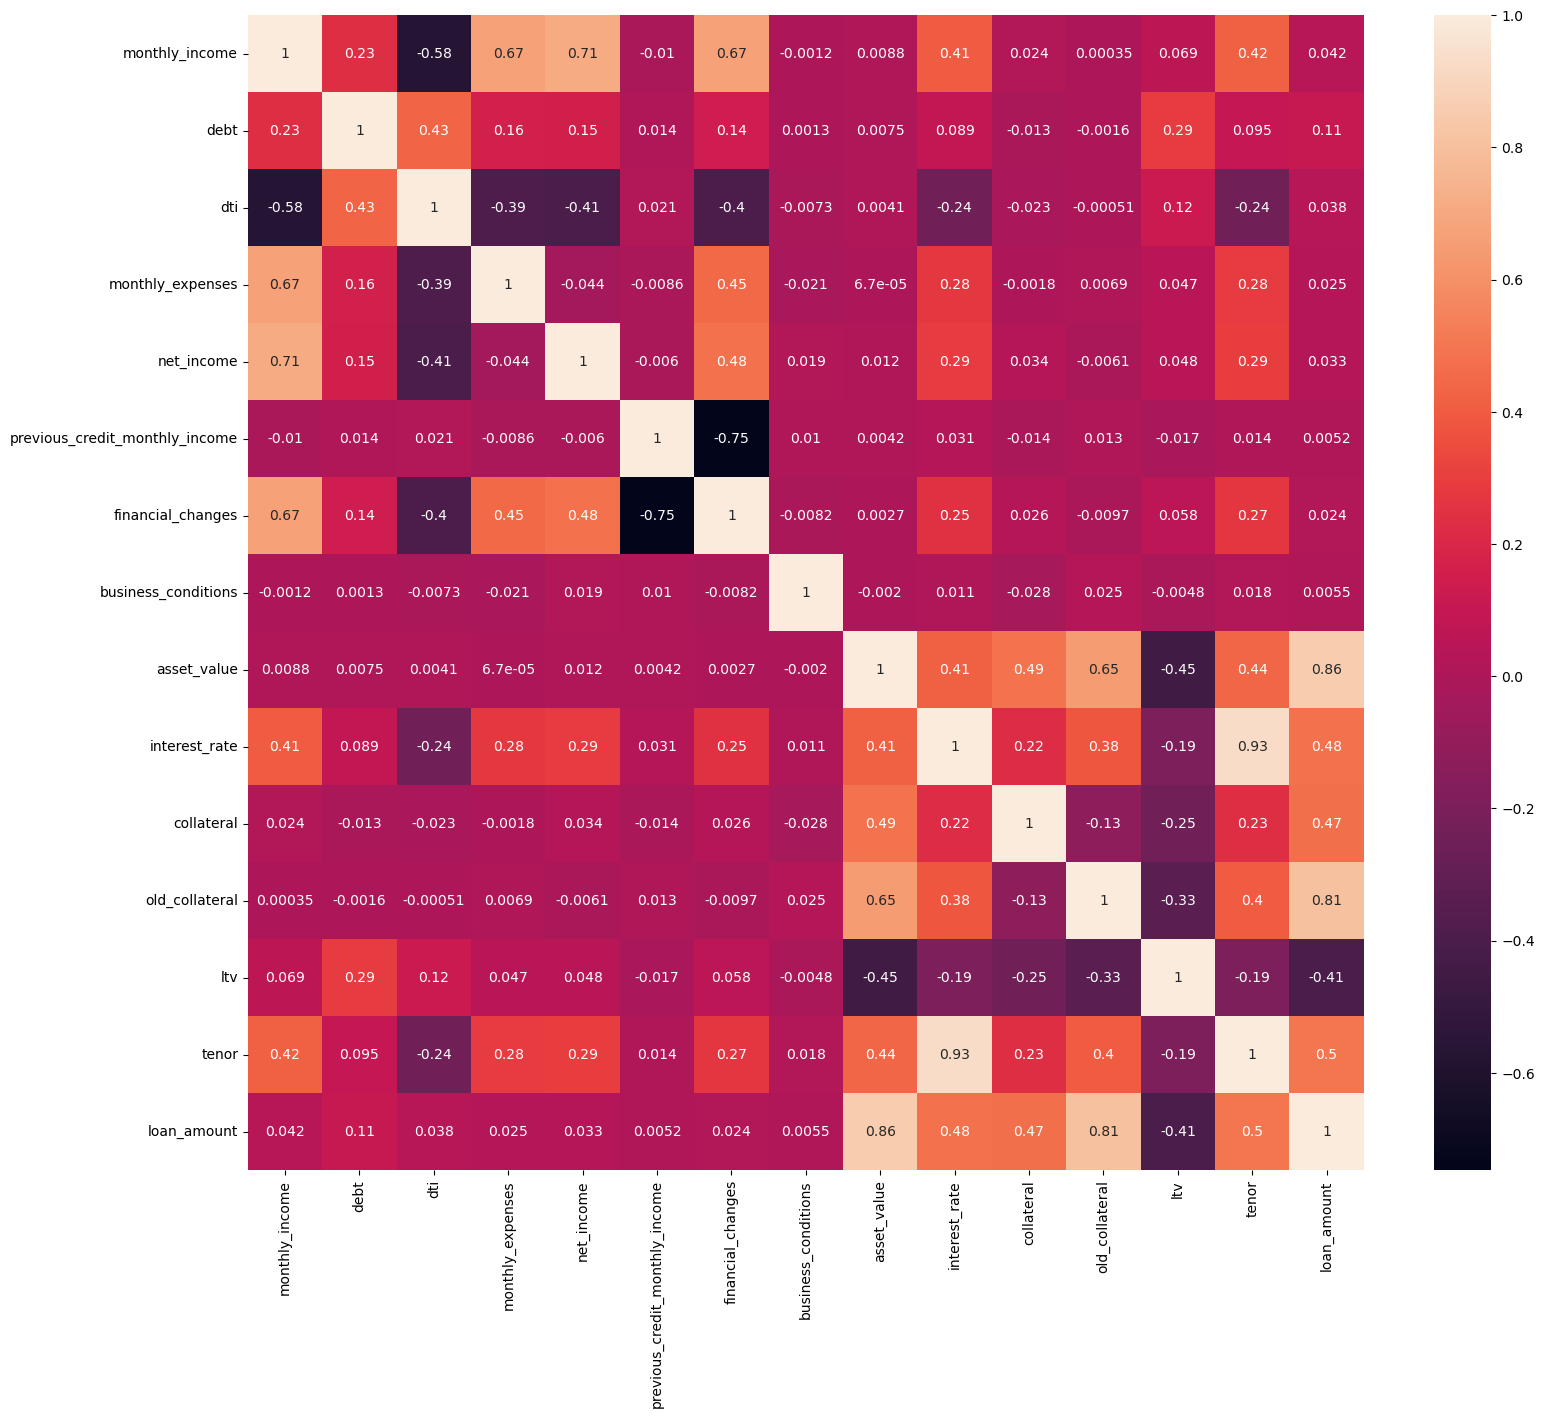

In [6]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(),annot=True)

In [47]:
select_loan = ['monthly_income', 'debt', 'dti', 'monthly_expenses',
        'net_income',
        'financial_changes', 'asset_value',
        'interest_rate', 'collateral','old_collateral', 'ltv',
        'debtor_occupation', 'tenor', 'loan_amount']

df = df[select_loan]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   monthly_income     3677 non-null   int64  
 1   debt               3677 non-null   float64
 2   dti                3677 non-null   float64
 3   monthly_expenses   3677 non-null   int64  
 4   net_income         3677 non-null   int64  
 5   financial_changes  3677 non-null   int64  
 6   asset_value        3677 non-null   int64  
 7   interest_rate      3677 non-null   float64
 8   collateral         3677 non-null   int64  
 9   old_collateral     3677 non-null   int64  
 10  ltv                3677 non-null   float64
 11  debtor_occupation  3677 non-null   object 
 12  tenor              3677 non-null   int64  
 13  loan_amount        3677 non-null   float64
dtypes: float64(5), int64(8), object(1)
memory usage: 402.3+ KB


### Normalization

In [48]:
numerical_loan = ['monthly_income', 'debt', 'dti', 'monthly_expenses',
                'net_income',
                'financial_changes', 'asset_value',
                'interest_rate', 'collateral','old_collateral', 'ltv',
                'tenor']

categorical_loan = ['debtor_occupation']

In [71]:
X2 = df.drop('loan_amount', axis=1)
y2 = df.loan_amount
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_nik                      3677 non-null   int64  
 1   debtor_name                     3677 non-null   object 
 2   debtor_gender                   3677 non-null   object 
 3   debtor_birth_place              3677 non-null   object 
 4   debtor_address                  3677 non-null   object 
 5   debtor_zip                      3677 non-null   int64  
 6   debtor_rt                       3677 non-null   int64  
 7   debtor_rw                       3677 non-null   int64  
 8   debtor_marital_status           3677 non-null   object 
 9   debtor_company                  3677 non-null   object 
 10  debtor_number                   3677 non-null   object 
 11  debtor_id                       3677 non-null   int64  
 12  debtor_age                      36

In [8]:
from sklearn.preprocessing import StandardScaler
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada dataset
X2[numerical_loan] = scaler.fit_transform(X2[numerical_loan])
X2.head()

,monthly_income,debt,dti,monthly_expenses,net_income,financial_changes,asset_value,interest_rate,collateral,old_collateral,ltv,debtor_occupation,tenor
0,0.415866,1.740099,0.238754,-0.933627,1.445913,0.888199,1.394151,1.782538,2.772353,0.346323,-0.302387,Pengusaha,1.879163
1,-0.059728,0.604095,0.041314,0.213270,-0.282755,-0.440548,-1.301056,-0.599743,-0.660716,-0.790729,0.373059,Pengusaha,-0.115801
2,0.365188,1.849806,0.334231,0.822733,-0.288010,-0.210025,0.268797,1.609281,-0.764330,0.926357,-0.158225,Pegawai Negeri,1.094627
3,-0.363796,-0.839797,-0.732540,0.091378,-0.576997,0.121514,-0.260367,-1.054543,-0.826498,0.756029,-0.388399,Pengusaha,-0.653769
4,-1.229219,-0.461129,2.135340,-0.700923,-0.992088,-1.199462,-0.567282,-1.054543,-0.370597,-0.938039,-0.064035,Pegawai Swasta,-0.788261


### Encoding

In [9]:
from sklearn.preprocessing import OrdinalEncoder

# Inisialisasi OrdinalEncoder
encoder = OrdinalEncoder()
# Melakukan encoding pada data kategori
X2[categorical_loan] = encoder.fit_transform(X2[categorical_loan])
X2.head(10)

,monthly_income,debt,dti,monthly_expenses,net_income,financial_changes,asset_value,interest_rate,collateral,old_collateral,ltv,debtor_occupation,tenor
0,0.415866,1.740099,0.238754,-0.933627,1.445913,0.888199,1.394151,1.782538,2.772353,0.346323,-0.302387,3.0,1.879163
1,-0.059728,0.604095,0.041314,0.213270,-0.282755,-0.440548,-1.301056,-0.599743,-0.660716,-0.790729,0.373059,3.0,-0.115801
2,0.365188,1.849806,0.334231,0.822733,-0.288010,-0.210025,0.268797,1.609281,-0.764330,0.926357,-0.158225,1.0,1.094627
3,-0.363796,-0.839797,-0.732540,0.091378,-0.576997,0.121514,-0.260367,-1.054543,-0.826498,0.756029,-0.388399,3.0,-0.653769
4,-1.229219,-0.461129,2.135340,-0.700923,-0.992088,-1.199462,-0.567282,-1.054543,-0.370597,-0.938039,-0.064035,2.0,-0.788261
5,-1.170745,-0.163857,2.327028,-1.027817,-0.603268,-1.409264,1.284791,-0.166601,-0.854128,0.723805,-0.318303,3.0,-0.339955
6,-0.223457,-0.404506,-0.493037,-0.157948,-0.151398,-0.308450,1.457651,1.154482,1.915813,1.161133,-0.409729,0.0,1.430857
7,0.482137,-0.620382,-0.890937,0.689759,-0.004277,1.069509,0.773266,1.067854,-0.439673,1.773391,-0.405934,2.0,1.744671
8,0.435357,0.855361,-0.190403,0.662056,-0.041057,0.269153,-1.406888,0.006656,-0.639993,-0.896608,0.674881,2.0,0.108352
9,-1.291592,-0.563759,2.635227,-0.955789,-0.834458,-0.010583,-1.124668,-1.595970,-0.812683,-1.066935,1.103160,4.0,-1.483137


### Splitting Data

In [72]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle = True)
X2_train.shape

(2941, 42)

# Model & Evaluation

### Machine Learning

In [13]:
from lazypredict.Supervised import LazyRegressor
reg= LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None, random_state=15)
models,predictions = reg.fit(X2_train, X2_test, y2_train, y2_test)
models

100%|██████████| 42/42 [05:24<00:00,  7.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2904
[LightGBM] [Info] Number of data points in the train set: 2941, number of used features: 13
[LightGBM] [Info] Start training from score 33965933.354386


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,1.00,1.00,0.00,0.02
Lars,1.00,1.00,0.00,0.00
TransformedTargetRegressor,1.00,1.00,0.00,0.02
RANSACRegressor,1.00,1.00,0.00,0.02
OrthogonalMatchingPursuitCV,1.00,1.00,0.00,0.04
LinearRegression,1.00,1.00,0.00,0.01
LassoLarsIC,1.00,1.00,0.00,0.02
LarsCV,1.00,1.00,0.00,0.03
LassoLars,1.00,1.00,2.00,0.02


In [17]:
def evaluate_performa(X_test, y_test, model1, model2, model3, model4, model5):
    rate = [0, 0, 0, 0, 0]
    #difference = [0, 0, 0, 0, 0]

    X_test = X_test.reset_index(drop=True)
    for i, _ in X_test.iterrows():
        X = np.array(X_test.iloc[[i]])
        y = np.array(y_test.iloc[[i]])
        difference = [0, 0, 0, 0, 0]
        difference[0] = abs(model1.predict(X) - y[0])
        difference[1] = abs(model2.predict(X) - y[0])
        difference[2] = abs(model3.predict(X) - y[0])
        difference[3] = abs(model4.predict(X) - y[0])
        difference[4] = abs(model5.predict(X) - y[0])
        #print(difference)

        a = int(np.argmin(difference))
        #print(a)
        for i in range(len(difference)):
            if difference[a] == difference[i]:
                rate[i] += 1
        best_model = []
        a = int(np.argmax(rate))
        for i in range(len(rate)):
            if rate[a] == rate[i]:
                best_model.append(i)

    return rate, best_model

In [18]:
from sklearn.linear_model import LassoLarsCV, Lars, RANSACRegressor, OrthogonalMatchingPursuitCV
from sklearn.compose import TransformedTargetRegressor

model_rl1 = LassoLarsCV()
model_rl2 = Lars()
model_rl3 = TransformedTargetRegressor()
model_rl4 = RANSACRegressor()
model_rl5 = OrthogonalMatchingPursuitCV()

model_rl1.fit(X2_train, y2_train)
model_rl2.fit(X2_train, y2_train)
model_rl3.fit(X2_train, y2_train)
model_rl4.fit(X2_train, y2_train)
model_rl5.fit(X2_train, y2_train)

#joblib.dump(model_rt1, 'model/model_rt1.joblib')
list_evaluate, best_model = evaluate_performa(X2_test, y2_test, model_rl1, model_rl2, model_rl3, model_rl4, model_rl5)
print('List Evaluate =', list_evaluate)
print('best model :', best_model)

List Evaluate = [413, 413, 293, 290, 458]
best model : [4]


In [11]:
from sklearn.linear_model import RANSACRegressor, OrthogonalMatchingPursuitCV
model2 = OrthogonalMatchingPursuitCV()
model2.fit(X2_train, y2_train)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_omp.py:419: RuntimeWarning: Orthogonal matching pursuit en

OrthogonalMatchingPursuitCV()

In [12]:

X = np.array(X2_test.iloc[[-0]])
X.reshape((-1, 1))
model2.predict(X)[0]

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OrthogonalMatchingPursuitCV was fitted with feature names
  warnings.warn(


53668333.33333327

In [13]:
y2_pred = model2.predict(X2_test)
y2_pred

array([53668333.33333327,  7981666.66666669, 58240000.00000001,
       34408333.33333337,  9508333.33333332, 21698333.33333336,
       53628333.33333337, 28443333.33333324, 32955000.00000002,
       52980000.00000001,  6026666.66666667, 11385000.00000002,
       21599999.99999994, 47178333.33333337,  5231666.6666666 ,
       37018333.33333331,  7616666.66666668, 66515000.00000004,
       22201666.66666661, 50048333.33333326,  4330000.00000001,
       21240000.00000003, 66796666.66666672, 44421666.66666666,
       64826666.6666667 , 42395000.00000004, 44350000.00000003,
       57770000.00000003, 27776666.66666669, 75490000.00000004,
       48911666.6666667 , 75878333.33333337, 22118333.3333333 ,
        9938333.33333335, 19788333.33333333, 33660000.00000001,
       51021666.66666666, 45256666.6666667 , 13098333.33333335,
       55301666.66666671, 20561666.66666657, 24039999.99999987,
       31524999.99999997, 37728333.33333337, 56548333.33333337,
       55731666.66666668, 24323333.33333

In [14]:
y2_test

714     5.366833e+07
3477    7.981667e+06
3661    5.824000e+07
10      3.440833e+07
1594    9.508333e+06
            ...     
2396    4.367833e+07
2705    1.431000e+07
701     2.240167e+07
228     3.928167e+07
1141    1.783000e+07
Name: loan_amount, Length: 736, dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

# Menampilkan hasil evaluasi
print(f"R - Mean Squared Error (RMSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

R - Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00


## Save Model

In [16]:
joblib.dump(model2, '../model/rl_best_model.joblib')
joblib.dump(encoder, '../model/rl_encoder.joblib')
joblib.dump(scaler, '../model/rl_scaler.joblib')

['../model/rl_scaler.joblib']

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [80]:
pipe_select_loan = ['monthly_income', 'debt', 'dti', 'monthly_expenses',
        'net_income',
        'financial_changes', 'asset_value',
        'interest_rate', 'collateral','old_collateral', 'ltv',
        'debtor_occupation', 'tenor']

In [81]:
column_transformer = ColumnTransformer(
    transformers=[
        ('selected_columns', 'passthrough', pipe_select_loan)  # Gunakan 'passthrough' untuk mempertahankan kolom yang dipilih
    ],
    remainder='drop'  # Menghapus kolom lain yang tidak dipilih
)
column_transformer

ColumnTransformer(transformers=[('selected_columns', 'passthrough',
                                 ['monthly_income', 'debt', 'dti',
                                  'monthly_expenses', 'net_income',
                                  'financial_changes', 'asset_value',
                                  'interest_rate', 'collateral',
                                  'old_collateral', 'ltv', 'debtor_occupation',
                                  'tenor'])])

In [90]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('standar_scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('Ordinal', OrdinalEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_loan),
        ('categorical', categorical_transformer, categorical_loan)
    ],
    remainder='drop'
)
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standar_scaler',
                                                  StandardScaler())]),
                                 ['monthly_income', 'debt', 'dti',
                                  'monthly_expenses', 'net_income',
                                  'financial_changes', 'asset_value',
                                  'interest_rate', 'collateral',
                                  'old_collateral', 'ltv', 'tenor']),
                                ('categorical',
                                 Pipeline(steps=[('Ordinal',
                                                  OrdinalEncoder())]),
                                 ['debtor_occupation'])])

In [91]:
from sklearn.linear_model import RANSACRegressor, OrthogonalMatchingPursuitCV

model = OrthogonalMatchingPursuitCV()

# Bundle preprocessing and modeling code in a pipeline
pipeline2 = Pipeline(steps=[#('select column', column_transformer),
                            ('preprocessing', preprocessor),
                              ('model', model)
                             ])
X2_train = pd.DataFrame(X2_train)
y2_train = pd.Series(y2_train)
# Preprocessing of training data, fit model
pipeline2.fit(X2_train, y2_train)
#pipeline2

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_omp.py:419: RuntimeWarning: Orthogonal matching pursuit en

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standar_scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_income', 'debt',
                                                   'dti', 'monthly_expenses',
                                                   'net_income',
                                                   'financial_changes',
                                                   'asset_value',
                                                   'interest_rate',
                                                   'collateral',
                                                   'old_collateral', 'ltv',
                                                   'tenor']),
                                                 ('categorical',
                                                  Pipeline(steps=[('Ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['debtor_occupation'])])),
                ('model', OrthogonalMatchingPursuitCV())])

In [ ]:
y_pred_p2 = pipeline2.predict(X2_test)
y_pred_p2

array([ 5849999.99999999, 31531666.66666665, 25621666.6666667 ,
       40338333.33333334, 26683333.33333334, 33228333.33333332,
       41349999.99999999, 22541666.6666667 , 15219999.99999999,
        8945000.00000001, 26503333.33333332,  5965000.        ,
        7616666.66666665, 32125000.        , 29071666.66666667,
       21763333.33333332, 23568333.33333332, 50769999.99999999,
        6709999.99999999, 12578333.33333333, 24478333.33333332,
       62006666.66666665, 74190000.        , 55113333.33333331,
       19135000.00000001, 66136666.66666664,  9009999.99999999,
        9921666.66666666, 40486666.66666665, 20748333.33333332,
       49926666.66666666, 59614999.99999997, 78993333.33333331,
        9181666.66666665, 19771666.66666666, 69983333.33333331,
       10168333.33333332, 62123333.33333332,  4703333.33333332,
       24078333.33333333, 55894999.99999998, 10458333.33333332,
       67576666.66666666, 11804999.99999999, 39679999.99999999,
        9803333.33333334,  9294999.99999

In [ ]:
y2_test

1439    5.850000e+06
3254    3.153167e+07
2729    2.562167e+07
2851    4.033833e+07
3583    2.668333e+07
            ...     
2856    2.210167e+07
1803    5.175333e+07
1971    2.104833e+07
3489    1.946500e+07
1901    3.487167e+07
Name: loan_amount, Length: 736, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = np.sqrt(mean_squared_error(y2_test, y_pred_p2))
mae = mean_absolute_error(y2_test, y_pred_p2)
r2 = r2_score(y2_test, y_pred_p2)

# Menampilkan hasil evaluasi
print(f"R - Mean Squared Error (RMSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

R - Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00


In [ ]:
joblib.dump(pipeline2, '../model/rl_pipeline.joblib')

['../model/rl_pipeline.joblib']

In [ ]:
pipeline2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standar_scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_income', 'debt',
                                                   'dti', 'monthly_expenses',
                                                   'net_income',
                                                   'financial_changes',
                                                   'asset_value',
                                                   'interest_rate',
                                                   'collateral',
                                                   'old_collateral', 'ltv',
                                                   'tenor']),
                                                 ('categorical',
                                                  Pipeline(steps=[('Ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['debtor_occupation'])])),
                ('model', OrthogonalMatchingPursuitCV())])